# Setup

In [149]:
#pip install python-utils

In [150]:
#pip install apyori

In [198]:
# Load Libraries

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from matplotlib import pyplot as plt
from  apyori import apriori
import utils
import seaborn as sns
%matplotlib inline

In [193]:
#Load Dataset

Nursery=pd.read_csv('nursery.data', header=None)
Nursery.rename(columns={0: 'parents', 1: 'has_nurs', 2: 'form', 3: 'children', 4: 'housing', 5: 'finance', 6: 'social', 7: 'health', 8: 'class'}, inplace=True) #Rename the column labels with the attribute 
Nursery.info()
Nursery.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   class     12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [154]:
Nursery.describe(include='all')

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [194]:
# To append/assign column names to its specific attribute values

for j in Nursery.columns:
    Nursery[j]= Nursery[j].map(lambda x: f'{j}={x}')
    
Nursery

,parents,has_nurs,form,children,housing,finance,social,health,class
0,parents=usual,has_nurs=proper,form=complete,children=1,housing=convenient,finance=convenient,social=nonprob,health=recommended,class=recommend
1,parents=usual,has_nurs=proper,form=complete,children=1,housing=convenient,finance=convenient,social=nonprob,health=priority,class=priority
2,parents=usual,has_nurs=proper,form=complete,children=1,housing=convenient,finance=convenient,social=nonprob,health=not_recom,class=not_recom
3,parents=usual,has_nurs=proper,form=complete,children=1,housing=convenient,finance=convenient,social=slightly_prob,health=recommended,class=recommend
4,parents=usual,has_nurs=proper,form=complete,children=1,housing=convenient,finance=convenient,social=slightly_prob,health=priority,class=priority
...,...,...,...,...,...,...,...,...,...
12955,parents=great_pret,has_nurs=very_crit,form=foster,children=more,housing=critical,finance=inconv,social=slightly_prob,health=priority,class=spec_prior
12956,parents=great_pret,has_nurs=very_crit,form=foster,children=more,housing=critical,finance=inconv,social=slightly_prob,health=not_recom,class=not_recom
12957,parents=great_pret,has_nurs=very_crit,form=foster,children=more,housing=critical,finance=inconv,social=problematic,health=recommended,class=spec_prior
12958,parents=great_pret,has_nurs=very_crit,form=foster,children=more,housing=critical,finance=inconv,social=problematic,health=priority,class=spec_prior


In [197]:
Nursery.values.tolist()

[['parents=usual',
  'has_nurs=proper',
  'form=complete',
  'children=1',
  'housing=convenient',
  'finance=convenient',
  'social=nonprob',
  'health=recommended',
  'class=recommend'],
 ['parents=usual',
  'has_nurs=proper',
  'form=complete',
  'children=1',
  'housing=convenient',
  'finance=convenient',
  'social=nonprob',
  'health=priority',
  'class=priority'],
 ['parents=usual',
  'has_nurs=proper',
  'form=complete',
  'children=1',
  'housing=convenient',
  'finance=convenient',
  'social=nonprob',
  'health=not_recom',
  'class=not_recom'],
 ['parents=usual',
  'has_nurs=proper',
  'form=complete',
  'children=1',
  'housing=convenient',
  'finance=convenient',
  'social=slightly_prob',
  'health=recommended',
  'class=recommend'],
 ['parents=usual',
  'has_nurs=proper',
  'form=complete',
  'children=1',
  'housing=convenient',
  'finance=convenient',
  'social=slightly_prob',
  'health=priority',
  'class=priority'],
 ['parents=usual',
  'has_nurs=proper',
  'form=compl

In [202]:
Nursery_list=Nursery.values.tolist()  #To make the dataset a list of lists

In [203]:
te=TransactionEncoder()
te_ary=te.fit(Nursery_list).transform(Nursery_list)
df=pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,children=1,children=2,children=3,children=more,class=not_recom,class=priority,class=recommend,class=spec_prior,class=very_recom,finance=convenient,...,health=recommended,housing=convenient,housing=critical,housing=less_conv,parents=great_pret,parents=pretentious,parents=usual,social=nonprob,social=problematic,social=slightly_prob
0,True,False,False,False,False,False,True,False,False,True,...,True,True,False,False,False,False,True,True,False,False
1,True,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,True,True,False,False
2,True,False,False,False,True,False,False,False,False,True,...,False,True,False,False,False,False,True,True,False,False
3,True,False,False,False,False,False,True,False,False,True,...,True,True,False,False,False,False,True,False,False,True
4,True,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,True,False,False,True


In [204]:
top10=df.sum().sort_values(ascending=False).iloc[:10]

In [208]:
top10

finance=convenient      6480
finance=inconv          6480
social=slightly_prob    4320
health=recommended      4320
housing=convenient      4320
housing=critical        4320
housing=less_conv       4320
parents=great_pret      4320
parents=pretentious     4320
health=not_recom        4320
dtype: int64

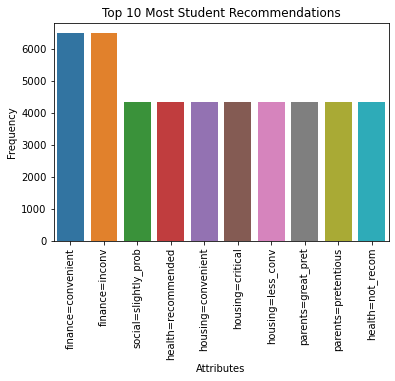

In [207]:
## Plot and Explore the dataset
sns.barplot(x=top10.index, y=top10.values)
plt.title('Top 10 Most Student Recommendations')
plt.ylabel('Frequency')
plt.xlabel('Attributes')
plt.xticks(rotation=90)
plt.show()

In [160]:
#Generating association rules

Nursery_Rules = list(apriori(Nursery_list, min_support=0.01, min_confidence=0.5, min_length=2))

In [161]:
len(Nursery_Rules)

5227

In [162]:
#Extract the created rules

associationRules = utils.extract(Nursery_Rules)
Nursery_Rulesdf = pd.DataFrame(associationRules,columns=['LHS','RHS','Support','Confidence','Lift'])
len(Nursery_Rulesdf)

8102

In [163]:
Nursery_Rulesdf.sum(axis=1).value_counts().sort_index()

C:\Users\Olufunmi\AppData\Local\Temp\ipykernel_25080\2291551757.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Nursery_Rulesdf.sum(axis=1).value_counts().sort_index()


1.510031      4
1.510185      2
1.510262      2
1.510340      2
1.510417    448
           ... 
5.973334      1
5.990733      1
6.357513      1
7.259898      1
7.514583      2
Length: 1066, dtype: int64

In [164]:
Nursery_Rulesdf.sum(axis=1).describe()

C:\Users\Olufunmi\AppData\Local\Temp\ipykernel_25080\379755941.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Nursery_Rulesdf.sum(axis=1).describe()


count    8102.000000
mean        2.366135
std         0.994883
min         1.510031
25%         1.513889
50%         2.011960
75%         3.511111
max         7.514583
dtype: float64

In [165]:
#View the rules generated using the utils.inspect function

utils.inspect(associationRules)

The number of associated rules: 8102
LHS: [] --> RHS:['finance=convenient'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['finance=inconv'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['children=1'] --> RHS:['finance=convenient'], support: 0.12, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['children=1'] --> RHS:['finance=inconv'], support: 0.12, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['children=2'] --> RHS:['finance=convenient'], support: 0.12, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['children=2'] --> RHS:['finance=inconv'], support: 0.12, confidence: 0.50, lift: 1.00
------------------

In [167]:
Nursery_Rulesdf.nlargest(15, "Lift")  ## Take a look at the top 15 rules with the highest lift

,LHS,RHS,Support,Confidence,Lift
4523,"[class=spec_prior, has_nurs=less_proper]","[parents=great_pret, health=priority]",0.014583,0.750000,6.750000
4527,"[class=spec_prior, has_nurs=proper]","[parents=great_pret, health=priority]",0.014583,0.750000,6.750000
4679,"[finance=convenient, class=very_recom]","[health=recommended, housing=convenient]",0.012191,0.724771,6.522936
604,[class=very_recom],"[health=recommended, housing=convenient]",0.016049,0.634146,5.707317
608,[class=very_recom],"[health=recommended, parents=usual]",0.015123,0.597561,5.378049
4684,"[finance=convenient, class=very_recom]","[health=recommended, parents=usual]",0.010031,0.596330,5.366972
4680,"[housing=convenient, class=very_recom]","[health=recommended, finance=convenient]",0.012191,0.759615,4.557692
611,[class=very_recom],"[health=recommended, social=nonprob]",0.012654,0.500000,4.500000
614,[class=very_recom],"[health=recommended, social=slightly_prob]",0.012654,0.500000,4.500000
595,[class=very_recom],"[health=recommended, finance=convenient]",0.016821,0.664634,3.987805


In [168]:
Nursery_Rulesdf.nlargest(15, "Support")  ## Take a look at the top 15 rules with the highest Support

,LHS,RHS,Support,Confidence,Lift
0,[],[finance=convenient],0.500000,0.500000,1.000000
1,[],[finance=inconv],0.500000,0.500000,1.000000
12,[class=not_recom],[health=not_recom],0.333333,1.000000,3.000000
13,[health=not_recom],[class=not_recom],0.333333,1.000000,3.000000
21,[class=spec_prior],[health=priority],0.190278,0.609792,1.829377
22,[health=priority],[class=spec_prior],0.190278,0.570833,1.829377
17,[class=priority],[health=recommended],0.186111,0.565401,1.696203
18,[health=recommended],[class=priority],0.186111,0.558333,1.696203
14,[class=priority],[finance=convenient],0.173148,0.526020,1.052039
19,[class=spec_prior],[finance=inconv],0.168827,0.541048,1.082097


In [169]:
Nursery_Rulesdf.nlargest(15, "Confidence")  ## Take a look at the top 15 rules with the highest Confidence

,LHS,RHS,Support,Confidence,Lift
12,[class=not_recom],[health=not_recom],0.333333,1.0,3.0
13,[health=not_recom],[class=not_recom],0.333333,1.0,3.0
25,[class=very_recom],[health=recommended],0.025309,1.0,3.0
74,"[children=1, class=not_recom]",[health=not_recom],0.083333,1.0,3.0
75,"[children=1, health=not_recom]",[class=not_recom],0.083333,1.0,3.0
86,"[children=1, class=very_recom]",[health=recommended],0.011420,1.0,3.0
131,"[children=2, class=not_recom]",[health=not_recom],0.083333,1.0,3.0
132,"[children=2, health=not_recom]",[class=not_recom],0.083333,1.0,3.0
187,"[children=3, class=not_recom]",[health=not_recom],0.083333,1.0,3.0
188,"[children=3, health=not_recom]",[class=not_recom],0.083333,1.0,3.0


In [170]:
## Filter out columns with empty list on the LHS of the Dataframe as they do not provide any association

Nursery_Rulesdf[Nurseryrules_df['LHS'].apply(lambda x: len(x) > 0)].nlargest(15, "Support")

,LHS,RHS,Support,Confidence,Lift
12,[class=not_recom],[health=not_recom],0.333333,1.000000,3.000000
13,[health=not_recom],[class=not_recom],0.333333,1.000000,3.000000
21,[class=spec_prior],[health=priority],0.190278,0.609792,1.829377
22,[health=priority],[class=spec_prior],0.190278,0.570833,1.829377
17,[class=priority],[health=recommended],0.186111,0.565401,1.696203
18,[health=recommended],[class=priority],0.186111,0.558333,1.696203
14,[class=priority],[finance=convenient],0.173148,0.526020,1.052039
19,[class=spec_prior],[finance=inconv],0.168827,0.541048,1.082097
10,[class=not_recom],[finance=convenient],0.166667,0.500000,1.000000
11,[class=not_recom],[finance=inconv],0.166667,0.500000,1.000000


In [171]:
Nursery_Rulesdf

,LHS,RHS,Support,Confidence,Lift
0,[],[finance=convenient],0.500000,0.500000,1.000000
1,[],[finance=inconv],0.500000,0.500000,1.000000
2,[children=1],[finance=convenient],0.125000,0.500000,1.000000
3,[children=1],[finance=inconv],0.125000,0.500000,1.000000
4,[children=2],[finance=convenient],0.125000,0.500000,1.000000
...,...,...,...,...,...
8097,"[health=recommended, housing=critical, parents...",[class=spec_prior],0.012037,0.975000,3.124629
8098,"[class=spec_prior, housing=less_conv, parents=...",[social=problematic],0.010802,0.514706,1.544118
8099,"[class=spec_prior, housing=less_conv, social=p...",[parents=great_pret],0.010802,0.500000,1.500000
8100,"[class=spec_prior, housing=less_conv, parents=...",[health=recommended],0.010802,0.500000,1.500000


In [210]:
Nursery_Rules[0]

RelationRecord(items=frozenset({'finance=convenient'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'finance=convenient'}), confidence=0.5, lift=1.0)])

In [173]:
0.5*100

50.0

In [174]:
50/100*8102 #to show how many times this occurs in my dataset

4051.0

In [211]:
rules = [j for j in Nursery_Rules if len(j[0]) >1] #to extract the records that are more than one

In [176]:
rules

[RelationRecord(items=frozenset({'finance=convenient', 'children=1'}), support=0.125, ordered_statistics=[OrderedStatistic(items_base=frozenset({'children=1'}), items_add=frozenset({'finance=convenient'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'finance=inconv', 'children=1'}), support=0.125, ordered_statistics=[OrderedStatistic(items_base=frozenset({'children=1'}), items_add=frozenset({'finance=inconv'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'finance=convenient', 'children=2'}), support=0.125, ordered_statistics=[OrderedStatistic(items_base=frozenset({'children=2'}), items_add=frozenset({'finance=convenient'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'finance=inconv', 'children=2'}), support=0.125, ordered_statistics=[OrderedStatistic(items_base=frozenset({'children=2'}), items_add=frozenset({'finance=inconv'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'finance=convenient', 'children=3'}), suppo

In [177]:
len(rules)

5225

In [178]:
Nursery_Rules[0][1]  ## support

0.5

In [179]:
Nursery_Rules[0][2][0][2]   ## Confidence

0.5

In [180]:
Nursery_Rules[0][2][0][3]  ## Lift

1.0

In [181]:
Nursery_Rules[0][2][0][0] ##antecedent

frozenset()

In [182]:
Nursery_Rules[0][2][0][1]  ## Consequent

frozenset({'finance=convenient'})

In [183]:
## Create a rule that shows the entire rules at a glance

list_of_dicts = []

for j in rules:
    New_Rules={
        'Antecedents': j[2][0][0],
        'Consequents': j[2][0][1],
        'Support': j[1],
        'Confidence': j[2][0][2],
        'Lift': j[2][0][3]
    }
    list_of_dicts.append(New_Rules)

In [184]:
New_Nurseryrules_df=pd.DataFrame(list_of_dicts)
New_Nurseryrules_df.head(10)

,Antecedents,Consequents,Support,Confidence,Lift
0,(children=1),(finance=convenient),0.125000,0.5,1.0
1,(children=1),(finance=inconv),0.125000,0.5,1.0
2,(children=2),(finance=convenient),0.125000,0.5,1.0
3,(children=2),(finance=inconv),0.125000,0.5,1.0
4,(children=3),(finance=convenient),0.125000,0.5,1.0
5,(children=3),(finance=inconv),0.125000,0.5,1.0
6,(children=more),(finance=convenient),0.125000,0.5,1.0
7,(children=more),(finance=inconv),0.125000,0.5,1.0
8,(class=not_recom),(finance=convenient),0.166667,0.5,1.0
9,(class=not_recom),(finance=inconv),0.166667,0.5,1.0


In [185]:
sort_rules_by_lift = New_Nurseryrules_df.sort_values('Lift', ascending=False).reset_index(drop=True)  #to sort the dataset by Lift and reset the numbering

sort_rules_by_lift.head(10)

,Antecedents,Consequents,Support,Confidence,Lift
0,"(class=spec_prior, has_nurs=proper)","(parents=great_pret, health=priority)",0.014583,0.750000,6.750000
1,"(class=spec_prior, has_nurs=less_proper)","(parents=great_pret, health=priority)",0.014583,0.750000,6.750000
2,"(finance=convenient, class=very_recom)","(health=recommended, housing=convenient)",0.012191,0.724771,6.522936
3,(class=very_recom),"(health=recommended, housing=convenient)",0.016049,0.634146,5.707317
4,(class=very_recom),"(health=recommended, parents=usual)",0.015123,0.597561,5.378049
5,"(finance=convenient, class=very_recom)","(health=recommended, parents=usual)",0.010031,0.596330,5.366972
6,(class=very_recom),"(health=recommended, social=slightly_prob)",0.012654,0.500000,4.500000
7,(class=very_recom),"(health=recommended, social=nonprob)",0.012654,0.500000,4.500000
8,(class=very_recom),"(health=recommended, finance=convenient)",0.016821,0.664634,3.987805
9,"(class=spec_prior, parents=usual, health=recom...",(has_nurs=very_crit),0.017052,0.778169,3.890845


## Plotting using a heatmap

In [186]:
##Change the frozen set to comma separated values (csv)

sort_rules_by_lift['Antecedents_sorted']=sort_rules_by_lift['Antecedents'].map(lambda x: ','.join(list(x)))
sort_rules_by_lift['Consequents_sorted']=sort_rules_by_lift['Consequents'].map(lambda x: ','.join(list(x)))

In [187]:
sort_rules_by_lift

,Antecedents,Consequents,Support,Confidence,Lift,Antecedents_sorted,Consequents_sorted
0,"(class=spec_prior, has_nurs=proper)","(parents=great_pret, health=priority)",0.014583,0.750000,6.750000,"class=spec_prior,has_nurs=proper","parents=great_pret,health=priority"
1,"(class=spec_prior, has_nurs=less_proper)","(parents=great_pret, health=priority)",0.014583,0.750000,6.750000,"class=spec_prior,has_nurs=less_proper","parents=great_pret,health=priority"
2,"(finance=convenient, class=very_recom)","(health=recommended, housing=convenient)",0.012191,0.724771,6.522936,"finance=convenient,class=very_recom","health=recommended,housing=convenient"
3,(class=very_recom),"(health=recommended, housing=convenient)",0.016049,0.634146,5.707317,class=very_recom,"health=recommended,housing=convenient"
4,(class=very_recom),"(health=recommended, parents=usual)",0.015123,0.597561,5.378049,class=very_recom,"health=recommended,parents=usual"
...,...,...,...,...,...,...,...
5220,"(housing=less_conv, class=priority, form=compl...",(finance=inconv),0.014506,0.500000,1.000000,"housing=less_conv,class=priority,form=completed",finance=inconv
5221,"(parents=usual, class=priority, form=completed)",(finance=inconv),0.018519,0.500000,1.000000,"parents=usual,class=priority,form=completed",finance=inconv
5222,"(has_nurs=less_proper, class=priority, form=fo...",(finance=inconv),0.012963,0.500000,1.000000,"has_nurs=less_proper,class=priority,form=foster",finance=inconv
5223,"(has_nurs=proper, class=priority, form=foster)",(finance=inconv),0.012963,0.500000,1.000000,"has_nurs=proper,class=priority,form=foster",finance=inconv


In [188]:
sort_rules_by_lift.head(10).pivot(index='Antecedents_sorted', columns='Consequents_sorted', values='Lift')

Consequents_sorted,has_nurs=very_crit,"health=recommended,finance=convenient","health=recommended,housing=convenient","health=recommended,parents=usual","health=recommended,social=nonprob","health=recommended,social=slightly_prob","parents=great_pret,health=priority"
Antecedents_sorted,,,,,,,
"class=spec_prior,has_nurs=less_proper",NaN,NaN,NaN,NaN,NaN,NaN,6.75
"class=spec_prior,has_nurs=proper",NaN,NaN,NaN,NaN,NaN,NaN,6.75
"class=spec_prior,parents=usual,health=recommended",3.890845,NaN,NaN,NaN,NaN,NaN,NaN
class=very_recom,NaN,3.987805,5.707317,5.378049,4.5,4.5,NaN
"finance=convenient,class=very_recom",NaN,NaN,6.522936,5.366972,NaN,NaN,NaN


In [189]:
Nursery_table = sort_rules_by_lift.head(10).pivot(index='Antecedents_sorted', columns='Consequents_sorted', values='Lift')

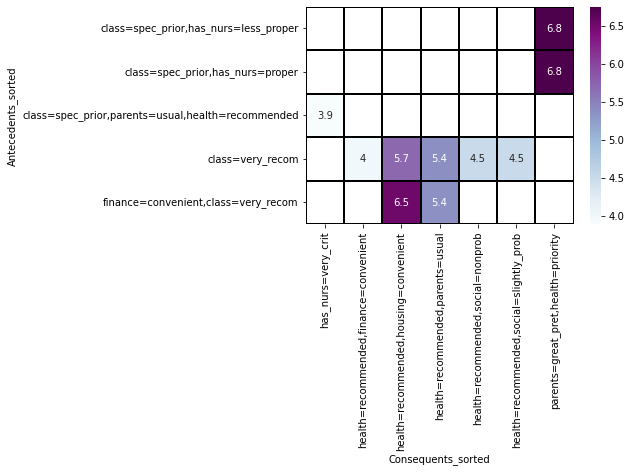

In [190]:
sns.heatmap(Nursery_table, annot=True, cmap='BuPu', linewidths=1.5, linecolor='black')
plt.show()